In [36]:
from GA.GA import GA_Design_Optim
import matplotlib.pyplot as plt
import numpy as np




In [21]:
pop = GA.pop
thigh_lenth,b,c,d,e = GA.translateDNA(pop)

thigh_lenth.sort()

thigh_lenth.sort()
idx = np.random.choice(np.arange(80), size=80, replace=True,)
#plt.plot(idx)
#plt.show()
print(idx)
GA.init_controller()

[14 15 74 39 64  1 45 64 50 62 40 27 45 43 67 39 31 30 33 74 60 40 47 70
 45 12 45 12 65 73 26 43 61 62 15 29 32 29 66 23 23 31  9 14 53 37 23 11
  4 40 60 25  7  6 55 71 10 34 70 13 40 47 69 19 50 46 39 12 30 13 72 38
 78 69 50  8 53 42 33  3]
load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [22]:
thigh_lenth[1]

0.7073260073260073

## 不使用vector env时，种群数量为80、评估取8次平均的一次全种群评估消耗时间7分42秒。

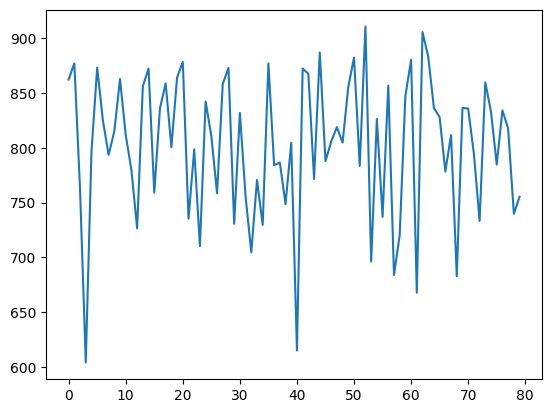

In [5]:
plt.plot(fitness)
plt.show()

In [37]:
# ------- 来自于mujoco150在win+py3.9下的矫情的要求 --------
# 手动添加mujoco路径
import os
from getpass import getuser
user_id = getuser()
os.add_dll_directory(f"C://Users//{user_id}//.mujoco//mujoco200//bin")
os.add_dll_directory(f"C://Users//{user_id}//.mujoco//mujoco-py-2.0.2.0//mujoco_py")
# -------------------------------------------------------
import time
import argparse
import sys
import gym_custom_env       # 注册自定义环境
import gym
import numpy as np
import pybullet_envs

from stable_baselines3 import SAC, TD3, PPO

In [38]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv
def update_xml_model(self,params):
    # VecEnv更新XML模型
    for env_idx in range(self.num_envs):
        self.envs[env_idx].update_xml_model(params)
    

DummyVecEnv.update_xml_model = update_xml_model
print('load from:')
save_path = 'best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip'
print(save_path)
env_kwargs = {'terrain_type':'steps'}
env_model = make_vec_env(env_id = 'HumanoidCustomEnv-v0', n_envs = 5, env_kwargs = env_kwargs)
algo = 'sac'
hyperparams = {
    "sac": dict(
        batch_size=256,
        gamma=0.98,
        policy_kwargs=dict(net_arch=[256, 256]),
        learning_starts=10000,
        buffer_size=int(5e2),
        tau=0.01,
        gradient_steps=4,
    ),
    "ppo": dict(
        batch_size=512,
        learning_rate=2.5e-4,
        policy_kwargs=dict(net_arch=({'pi':[128,128]},{'vf':[128,128]})),
        gamma=0.99
    )
}[algo]
model = SAC("MlpPolicy", env_model, verbose=1,  **hyperparams)
model.set_parameters(save_path)

load from:
best_model/5e6_steps_t5_cpu8_sac_HumanoidCustomEnv-v0.zip
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
Using cuda device


## VecEnv 评估

In [3]:

n_envs = 8
env_model = make_vec_env(env_id = 'HumanoidCustomEnv-v0', n_envs = n_envs, env_kwargs = env_kwargs)
obs = env_model.reset()
episode = 0
episode_rewards = []
episode_reward = np.zeros(n_envs)
while episode < n_envs:
    action, _  = model.predict(obs,)
    obs, rewards, dones, infos = env_model.step(action)
    episode_reward += rewards
    for idx,done in enumerate(dones):
        if done:
            print(idx)
            episode += 1
            episode_rewards.append(episode_reward[idx])
            episode_reward[idx] = 0
print(np.mean(episode_rewards))



============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
2
4
5
6
1
0
7
3
793.5681199803948


# GA 算法测试

In [39]:
from GA import GA_Design_Optim

GA_optimizer = GA_Design_Optim(model,decode_size = 20,POP_size=50,n_generations=10)

GA_optimizer.evolve()
#GA_optimizer.save_fig(fig_name= 'GA_test1')

pop_data = GA_optimizer.pop_data
fitness_data = GA_optimizer.fitness_data


============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
============ HUMANOID CUSTOM ENV ============
=====terrain type:steps=====
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
3
0
4
2
3
1
7
6
num: 0
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML Model ----- 
----- Update XML 

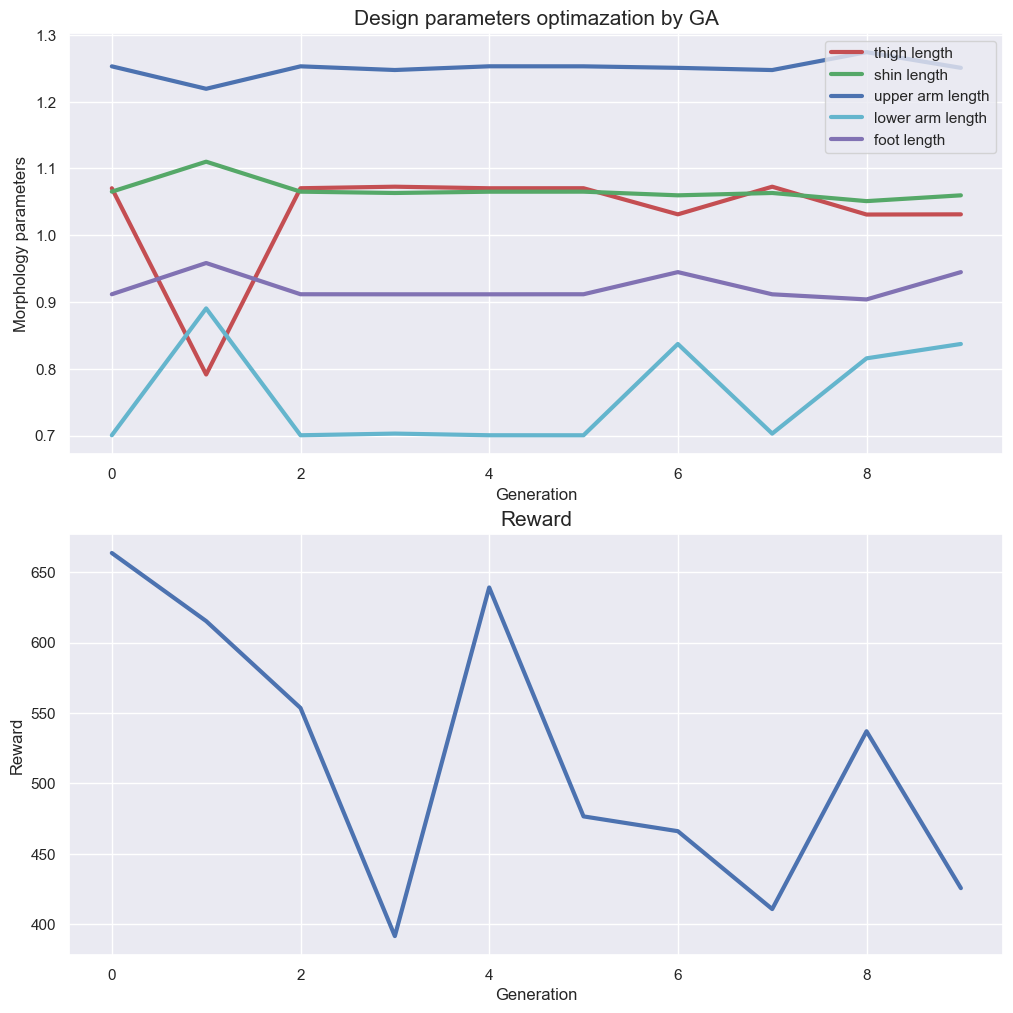

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # 导入模块
import pandas as pd
sns.set() # 设置美化参数，一般默认就好

t,s,u,l,f = GA_optimizer.translateDNA(np.array(GA_optimizer.best_individual))

fig = plt.figure(1,figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(t,color='r',linewidth = 3)
plt.plot(s,color='g',linewidth = 3)
plt.plot(u,color='b',linewidth = 3)
plt.plot(l,color='c',linewidth = 3)
plt.plot(f,color='m',linewidth = 3)
plt.legend(['thigh length','shin length','upper arm length','lower arm length','foot length'])
plt.title('Design parameters optimazation by GA',fontsize=15)
plt.xlabel('Generation')
plt.ylabel('Morphology parameters')

bw = []
for i in range(10):
    bw.append(max(fitness_data[i]))
fitness_data
plt.subplot(2,1,2)
#plt.plot(GA_optimizer.best_reward,color='b',linewidth = 3)
plt.plot(bw,color='b',linewidth = 3)
plt.title('Reward',fontsize=15)
plt.xlabel('Generation')
plt.ylabel('Reward')
fig_name = 'GA_optim_result'
fig.tight_layout(pad=0.2, w_pad=0, h_pad=0.5)
#plt.savefig('screenshot/'+fig_name+'_t0.png', dpi = 1200)
plt.show()

In [16]:
pop = np.random.randint(2, size=(GA_optimizer.POP_size, GA_optimizer.DNA_size)) # 随机初始化种群

## 散点图绘制

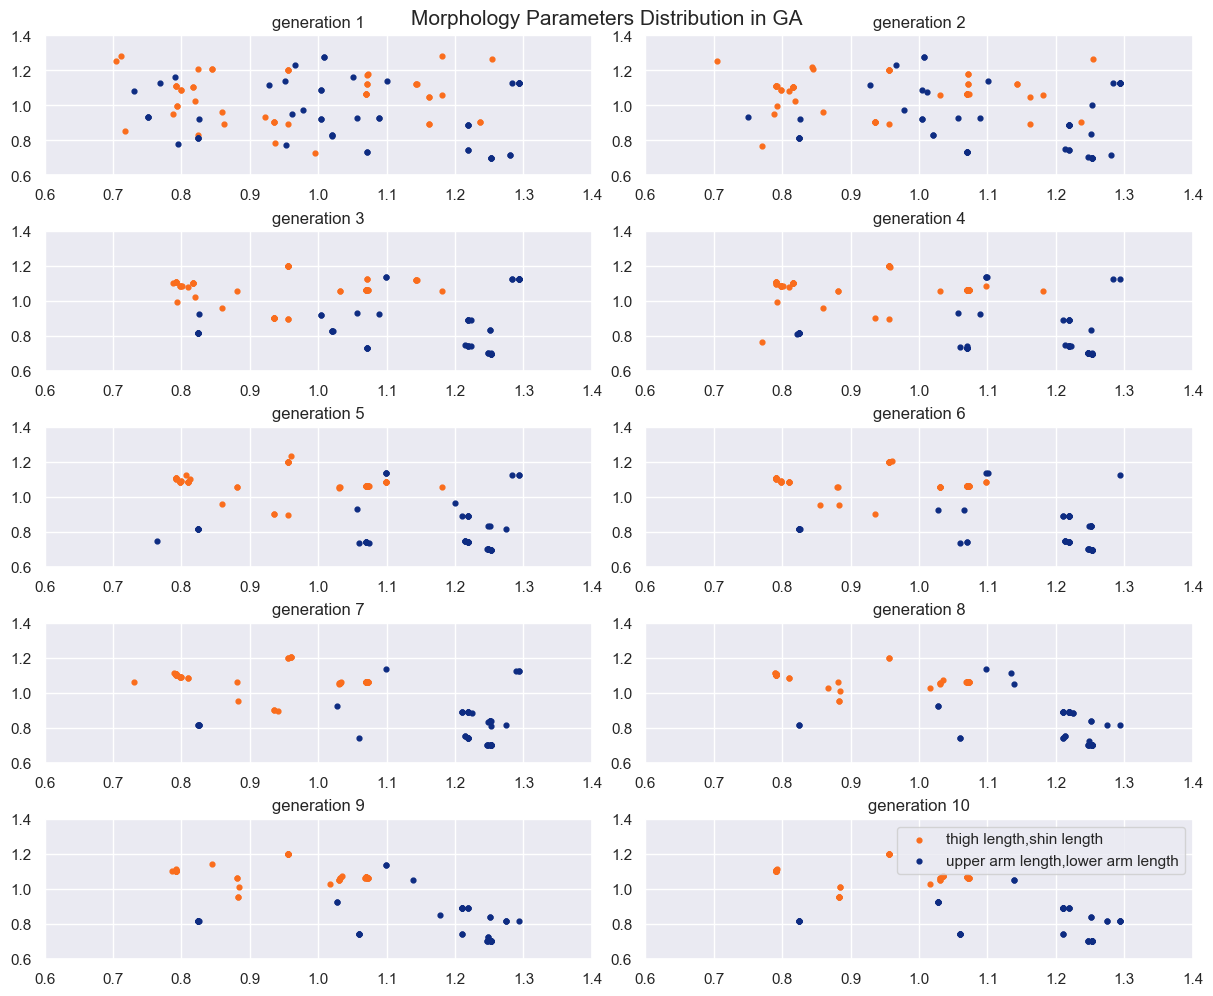

In [41]:

from matplotlib import cm

# 设计参数散点图
fig = plt.figure(2,figsize=(12, 10))
for i in range(10):
    t,s,u,l,f=GA_optimizer.translateDNA(pop_data[i])
    plt.subplot(5,2,i+1)
    plt.scatter(t,s,color='#fa6d1d',s=12)
    plt.scatter(u,l,color='#0e2c82',s=12)
    plt.axis([0.6,1.4,0.6,1.4])
    plt.title(f'generation {i+1}')
plt.subplot(5,2,10)
plt.legend(['thigh length,shin length','upper arm length,lower arm length'])
plt.suptitle('Morphology Parameters Distribution in GA',fontsize=15)
fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.5)
#plt.savefig('screenshot/'+'GA_optim_result_scatter_t0'+'.png', dpi=1200)


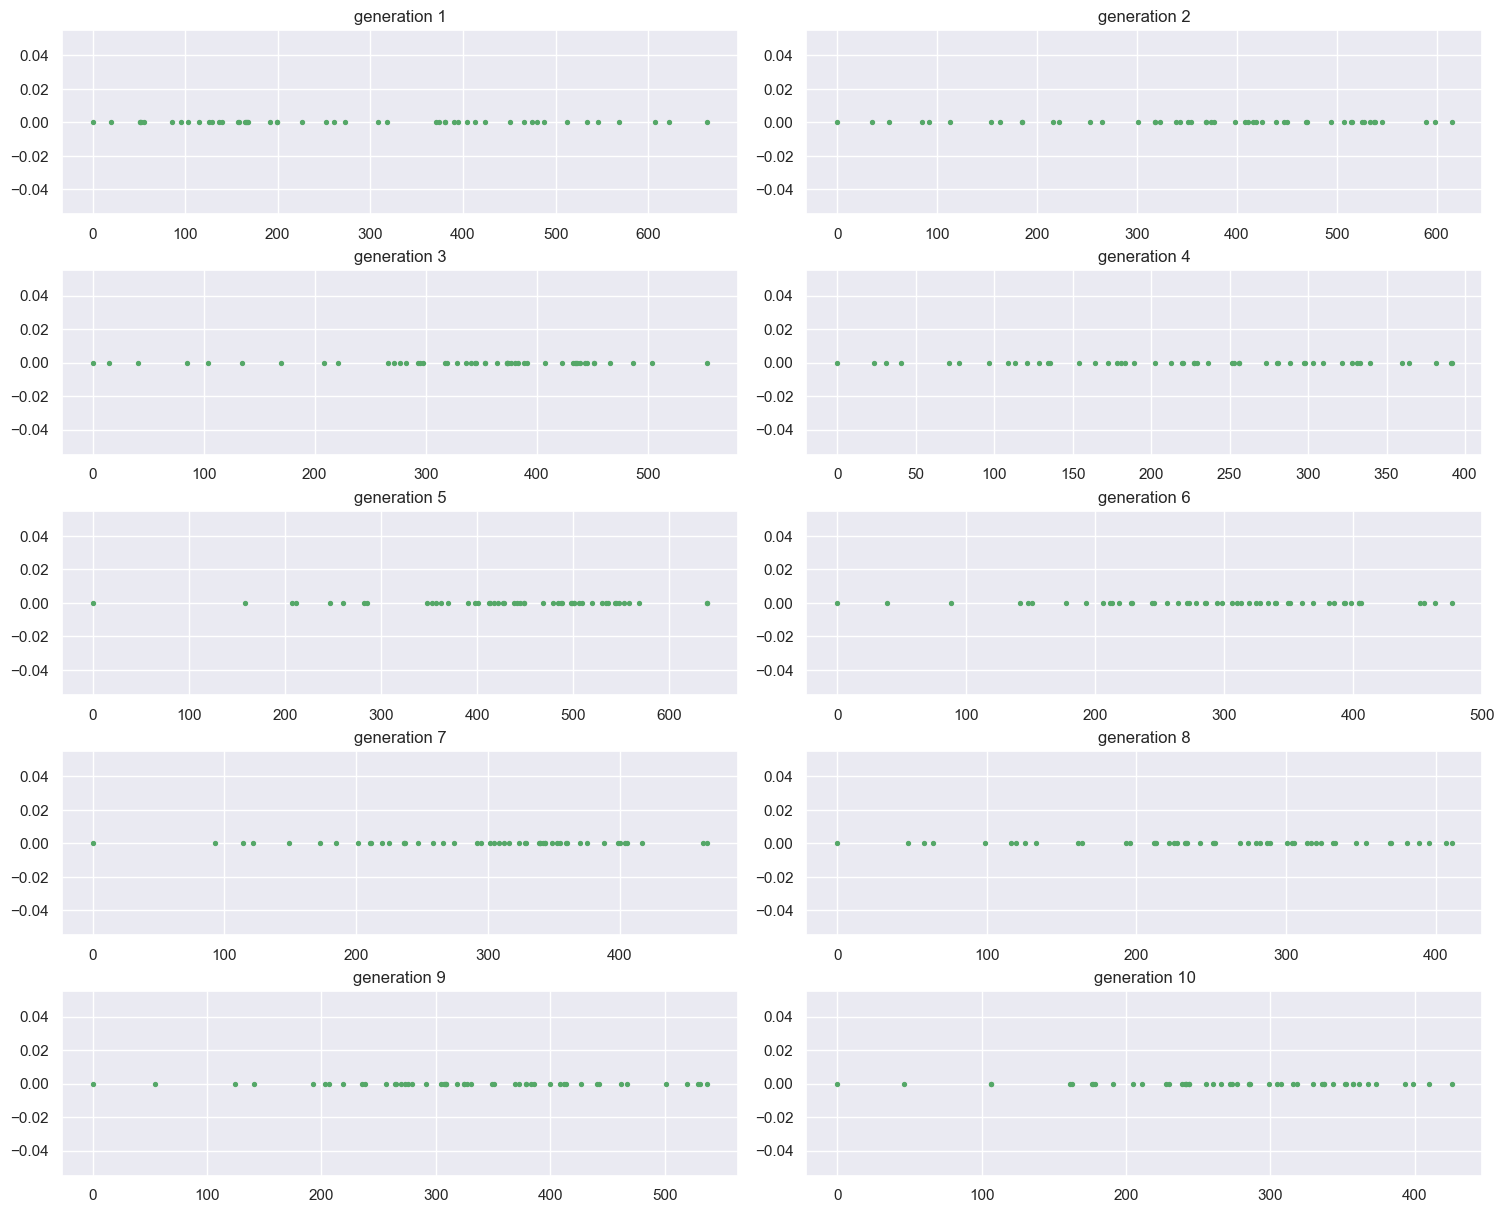

In [42]:
fig=plt.figure(3,figsize=(15, 12))
for i in range(10):
    f = fitness_data[i]
    y = np.zeros(len(f))
    plt.subplot(5,2,i+1)
    plt.scatter(f,y,color='g',s=8)
    plt.title(f'generation {i+1}')
fig.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.5)
#plt.savefig('screenshot/'+'4-28-scatter2'+'.png', bbox_inches='tight')